In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip

^C


In [2]:
!unzip concrete_data_week2.zip

^C


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator

In [4]:
os.listdir('concrete_data_week2')

['.DS_Store', 'Negative', 'Positive']

In [5]:
dataset_dir = './concrete_data_week2'

In [6]:
data_generator = ImageDataGenerator()

Keras 에 있는 <code>flow_from_directory</code> 는 image들을 batch 크게 따라 루프를 돌리게 해준다. 이렇게 정규화시켜 랜덤화된 이미지 데이터들을 얻을 수 있다. (디렉토리 지정 필수)
그래서 이미지 데이터들의 결과값또한 (몇개인지 클래스는 몇개인지) 얻을 수 있어서 좋다.

In [7]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
)

Found 40000 images belonging to 2 classes.


In [8]:
first_batch = image_generator.next()
first_batch

(array([[[[151., 149., 150.],
          [153., 151., 152.],
          [155., 153., 154.],
          ...,
          [153., 149., 148.],
          [153., 149., 148.],
          [153., 149., 148.]],
 
         [[152., 150., 151.],
          [154., 152., 153.],
          [156., 154., 155.],
          ...,
          [154., 150., 149.],
          [154., 150., 149.],
          [154., 150., 149.]],
 
         [[153., 151., 152.],
          [155., 153., 154.],
          [156., 154., 155.],
          ...,
          [156., 152., 151.],
          [156., 152., 151.],
          [156., 152., 151.]],
 
         ...,
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [139., 135., 136.],
          [142., 138., 139.],
          [145., 141., 142.]],
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [140., 136., 137.],
          [142., 138., 139.],
          [146., 142., 143.

In [9]:
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[172., 174., 169.],
         [176., 178., 173.],
         [181., 183., 178.],
         ...,
         [157., 159., 154.],
         [156., 158., 153.],
         [154., 156., 151.]],

        [[170., 172., 167.],
         [172., 174., 169.],
         [174., 176., 171.],
         ...,
         [155., 157., 152.],
         [154., 156., 151.],
         [153., 155., 150.]],

        [[169., 171., 166.],
         [167., 169., 164.],
         [166., 168., 163.],
         ...,
         [152., 154., 149.],
         [152., 154., 149.],
         [151., 153., 148.]],

        ...,

        [[153., 154., 148.],
         [155., 156., 150.],
         [158., 159., 153.],
         ...,
         [143., 144., 138.],
         [144., 145., 139.],
         [145., 146., 140.]],

        [[147., 148., 142.],
         [150., 151., 145.],
         [153., 154., 148.],
         ...,
         [142., 143., 137.],
         [143., 144., 138.],
         [144., 145., 139.]],

        [[141., 142., 136.],
       

In [10]:
first_batch_labels = image_generator.next()[1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [11]:
# custom
data_generator = ImageDataGenerator(
    rescale=1./255
)

In [12]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
)

Found 40000 images belonging to 2 classes.


In [13]:
first_batch = image_generator.next()
first_batch

(array([[[[0.5921569 , 0.58431375, 0.5882353 ],
          [0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          ...,
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ]],
 
         [[0.59607846, 0.5882353 , 0.5921569 ],
          [0.6039216 , 0.59607846, 0.6       ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375]],
 
         [[0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ]],
 
         ...,
 
         [[0.5568628 , 0.54901963, 0.56078434],
          [0.55686

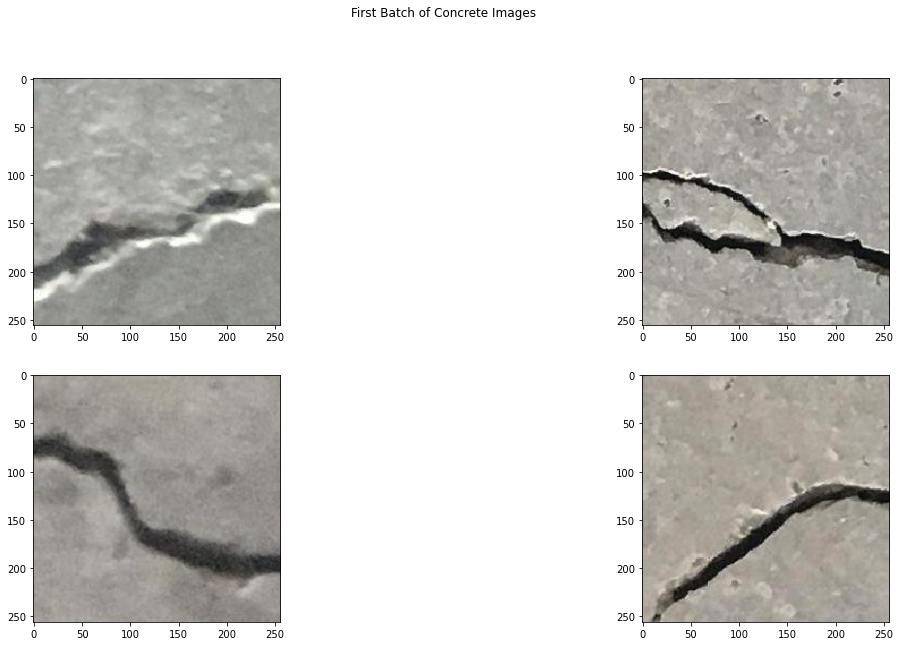

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))  # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images')
plt.show()

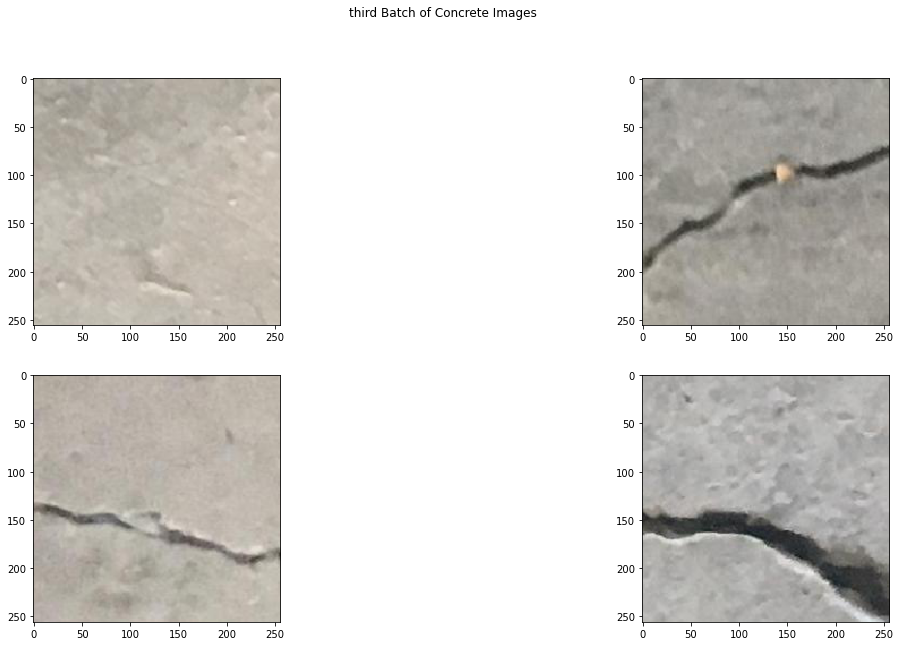

In [15]:
second_batch = image_generator.next()[0]
third_batch = image_generator.next()[0]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))  # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = third_batch[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('third Batch of Concrete Images')
plt.show()

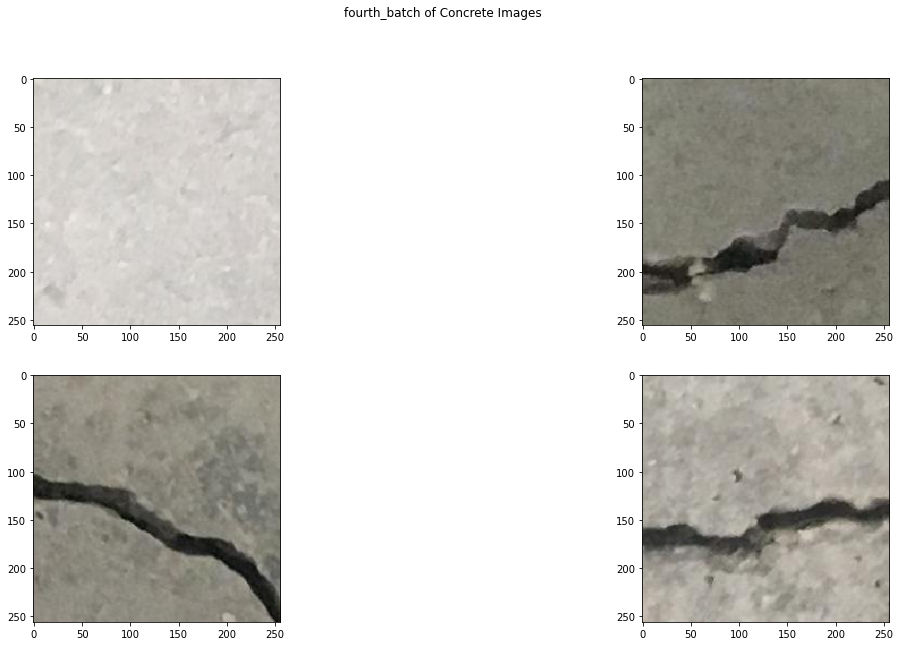

In [16]:
fourth_batch = image_generator.next()[0]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))  # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = fourth_batch[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('fourth_batch of Concrete Images')
plt.show()

In [17]:
len(fourth_batch)

4

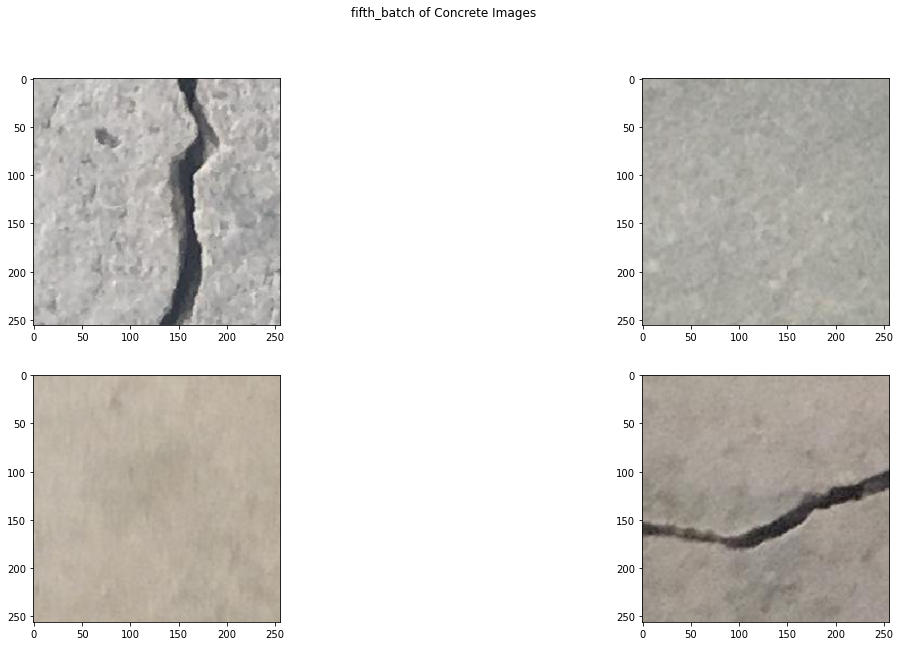

In [18]:
fifth_batch = image_generator.next()[0]


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))  # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = fifth_batch[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('fifth_batch of Concrete Images')
plt.show()



In [19]:
len(fifth_batch)

4

--2021-05-15 10:32:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260502910 (248M) [application/zip]
Saving to: 'concrete_data_week2.zip.1'

     0K .......... .......... .......... .......... ..........  0%  153K 27m41s
    50K .......... .......... .......... .......... ..........  0% 19.9M 13m57s
   100K .......... .......... .......... .......... ..........  0%  309K 13m52s
   150K .......... .......... .......... .......... ..........  0% 23.6M 10m26s
   200K .......... .......... .......... .......... ..........  0%  316K 11m2s
   250K .......... .......... .......... .......... ..........  0%  410K 10m55s